In [46]:
import pandas as pd  #Read and load csv,text,excel similar...
import numpy as np   #Mathematical operations
import matplotlib.pyplot as plt  #Create graph and visualize data
import seaborn as sns  #Create graph and visualize data
from sklearn.preprocessing import OneHotEncoder


In [47]:
data= pd.read_csv("birlesik_veri.csv")

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Overall rank                   312 non-null    float64
 1   Country or region              312 non-null    object 
 2   Score                          312 non-null    float64
 3   GDP per capita                 312 non-null    float64
 4   Social support                 312 non-null    float64
 5   Healthy life expectancy        312 non-null    float64
 6   Freedom to make life choices   312 non-null    float64
 7   Generosity                     782 non-null    float64
 8   Perceptions of corruption      311 non-null    float64
 9   Year                           782 non-null    int64  
 10  Country                        470 non-null    object 
 11  Happiness.Rank                 155 non-null    float64
 12  Happiness.Score                155 non-null    flo

In [49]:
def combine_columns(df, columns, new_col_name):

    df[new_col_name] = pd.NA
    for col in columns:
        if col in df.columns:
            df[new_col_name] = df[new_col_name].fillna(df[col])
    return df


In [50]:
data = combine_columns(data, ['GDP per capita', 'Economy (GDP per Capita)', 'Economy..GDP.per.Capita.'], 'gdp')
data = combine_columns(data, ['Happiness Score', 'Happiness.Score', 'Score'], 'happiness_score')
data = combine_columns(data, ['Healthy life expectancy', 'Health (Life Expectancy)', 'Health..Life.Expectancy.'], 'health')
data = combine_columns(data, ['Trust (Government Corruption)', 'Trust..Government.Corruption.', 'Perceptions of corruption'], 'trust')
data = combine_columns(data, ['Freedom', 'Freedom to make life choices'], 'freedom')
data = combine_columns(data, ['Country', 'Country or region'], 'country')
data = combine_columns(data, ['Social support', 'Family'], 'social_support')
data = combine_columns(data, ['Generosity'], 'generosity')

<ipython-input-49-63e4b815abec>:6: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[new_col_name] = df[new_col_name].fillna(df[col])
<ipython-input-49-63e4b815abec>:6: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[new_col_name] = df[new_col_name].fillna(df[col])
<ipython-input-49-63e4b815abec>:6: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', Tr

In [51]:
data = data.drop(columns=[
    'GDP per capita', 'Economy (GDP per Capita)', 'Economy..GDP.per.Capita.',
    'Happiness Score', 'Happiness.Score', 'Score',
    'Healthy life expectancy', 'Health (Life Expectancy)', 'Health..Life.Expectancy.',
    'Trust (Government Corruption)', 'Trust..Government.Corruption.', 'Perceptions of corruption',
    'Freedom', 'Freedom to make life choices',
    'Country', 'Country or region',
    'Social support', 'Family',
    'Generosity'
], errors='ignore')


In [52]:
data['gdp_x_trust'] = data['gdp'] * data['trust']
data['freedom_squared'] = data['freedom'] ** 2
data['generosity_log'] = np.log1p(data['generosity'])


In [53]:
columns_to_convert = ['gdp', 'freedom', 'trust', 'social_support',
        'gdp_x_trust', 'freedom_squared', 'generosity_log']


In [54]:
for col in columns_to_convert:
    data[col] = data[col].fillna(data[col].mean())

In [55]:
for col in columns_to_convert:
    data[col] = data[col].astype(float)


In [56]:
print(data.dtypes)

Overall rank                 float64
Year                           int64
Happiness.Rank               float64
Whisker.high                 float64
Whisker.low                  float64
Dystopia.Residual            float64
Region                        object
Happiness Rank               float64
Lower Confidence Interval    float64
Upper Confidence Interval    float64
Dystopia Residual            float64
Standard Error               float64
gdp                          float64
happiness_score              float64
health                       float64
trust                        float64
freedom                      float64
country                       object
social_support               float64
generosity                   float64
gdp_x_trust                  float64
freedom_squared              float64
generosity_log               float64
dtype: object


In [57]:
print(data.columns.tolist())



['Overall rank', 'Year', 'Happiness.Rank', 'Whisker.high', 'Whisker.low', 'Dystopia.Residual', 'Region', 'Happiness Rank', 'Lower Confidence Interval', 'Upper Confidence Interval', 'Dystopia Residual', 'Standard Error', 'gdp', 'happiness_score', 'health', 'trust', 'freedom', 'country', 'social_support', 'generosity', 'gdp_x_trust', 'freedom_squared', 'generosity_log']


In [58]:
data[columns_to_convert].isnull().sum()


,0
gdp,0
freedom,0
trust,0
social_support,0
gdp_x_trust,0
freedom_squared,0
generosity_log,0


In [59]:
print(data.shape)

(782, 23)


In [60]:
data.head(5)

,Overall rank,Year,Happiness.Rank,Whisker.high,Whisker.low,Dystopia.Residual,Region,Happiness Rank,Lower Confidence Interval,Upper Confidence Interval,...,happiness_score,health,trust,freedom,country,social_support,generosity,gdp_x_trust,freedom_squared,generosity_log
0,1.0,2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.632,0.874,0.393,0.681,Finland,1.592,0.202,0.512865,0.463761,0.183987
1,2.0,2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.594,0.861,0.340,0.686,Norway,1.582,0.286,0.495040,0.470596,0.251537
2,3.0,2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.555,0.868,0.408,0.683,Denmark,1.590,0.284,0.551208,0.466489,0.249980
3,4.0,2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.495,0.914,0.138,0.677,Iceland,1.644,0.353,0.185334,0.458329,0.302324
4,5.0,2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.487,0.927,0.357,0.660,Switzerland,1.549,0.256,0.506940,0.435600,0.227932


In [61]:
top_countries = data.sort_values(by='happiness_score', ascending=False)[['country', 'happiness_score']].head(10)
print("En Mutlu 10 Ülke:\n", top_countries)


En Mutlu 10 Ülke:
          country  happiness_score
626      Finland            7.769
0        Finland            7.632
627      Denmark            7.600
1         Norway            7.594
468  Switzerland            7.587
469      Iceland            7.561
2        Denmark            7.555
628       Norway            7.554
156       Norway            7.537
470      Denmark            7.527


In [62]:
data = data.drop(columns=['generosity'], errors='ignore')

In [63]:
X = data[["gdp", "freedom", "trust", "social_support",
          "gdp_x_trust", "freedom_squared", "generosity_log"]]
y = data[["happiness_score"]]


In [64]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [65]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=32)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(547, 7)
(235, 7)
(547, 1)
(235, 1)


In [66]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [67]:
model.fit(X_train,y_train)

LinearRegression()

In [68]:
print (model.coef_)
print (model.intercept_)

[[ 1.45673417  1.5855598  -0.07558749  0.78118255  0.76719735 -0.2917969
   0.72384336]]
[2.37024356]


In [69]:
y_pred = model.predict(X_test)

In [70]:
Tahminlerimiz = model.predict(X_test)

In [71]:
tahmin_ve_sonuclar = pd.DataFrame({
    "Gerçek Değerler": y_test.values.reshape(-1,),
    "Tahminlerimiz": Tahminlerimiz.reshape(-1,)
})

In [72]:
tahmin_ve_sonuclar.head(10)

,Gerçek Değerler,Tahminlerimiz
0,6.375,7.359068
1,5.129,5.107910
2,5.945,5.765878
3,6.084,5.227943
4,6.168,6.387967
5,5.013,4.643507
6,4.291,4.959184
7,5.500,5.728419
8,5.878,5.521197
9,7.039,6.137443


<Axes: >

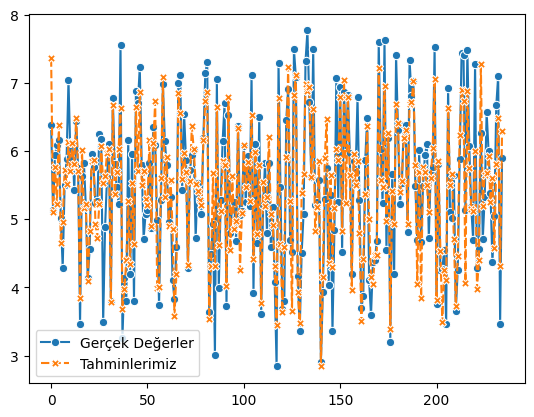

In [73]:
sns.lineplot(data=tahmin_ve_sonuclar, markers=True)

In [74]:
from sklearn import metrics
HataDeger= metrics.mean_squared_error(y_test.values.reshape(-1,),Tahminlerimiz.reshape(-1,))
print("Ortalama Kare Hatası:" , HataDeger)

Ortalama Kare Hatası: 0.2659758311761368


In [75]:
from sklearn.metrics import r2_score
r2= r2_score(y_test, Tahminlerimiz)

In [76]:
print("R2 Score : ", r2)

R2 Score :  0.7933325200562881


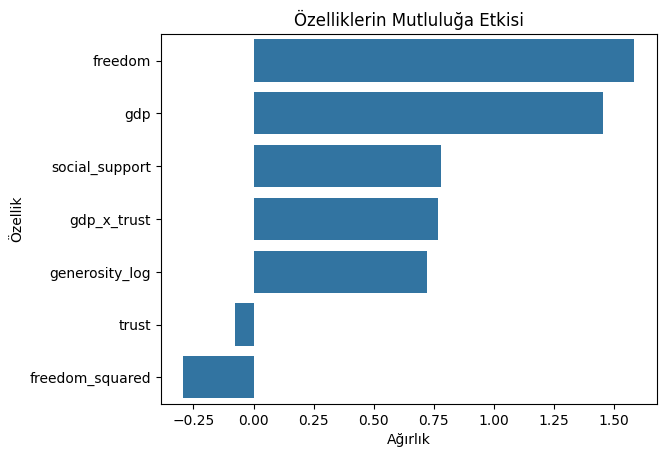

In [77]:
coefs = model.coef_.flatten()
feature_names = X.columns

coef_df = pd.DataFrame({'Özellik': feature_names, 'Ağırlık': coefs})
coef_df = coef_df.sort_values(by='Ağırlık', ascending=False)

sns.barplot(data=coef_df, x='Ağırlık', y='Özellik')
plt.title('Özelliklerin Mutluluğa Etkisi')
plt.show()


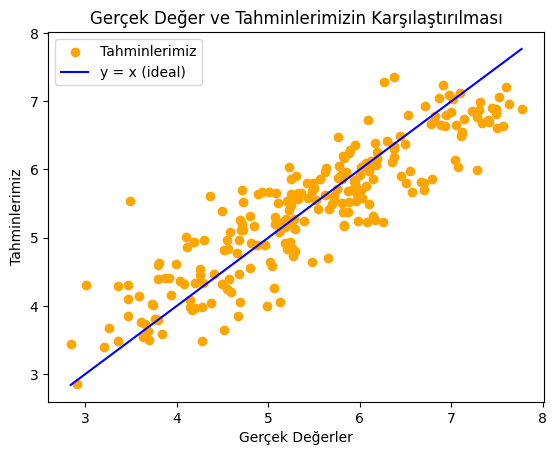

In [78]:
import matplotlib.pyplot as plt

plt.scatter(y_test, Tahminlerimiz, color='orange', label='Tahminlerimiz')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='blue', label='y = x (ideal)')
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahminlerimiz')
plt.title('Gerçek Değer ve Tahminlerimizin Karşılaştırılması')
plt.legend()
plt.show()

